In [11]:
# load the queso prior and posterior
import numpy as np
from numpy.random import randn
import matplotlib
import matplotlib.pyplot as plt

post = np.loadtxt('fp_p_seq_1_exp_1.m')
post_the_0 = post[:,0]
post_the_1 = post[:,1]
#post.shape

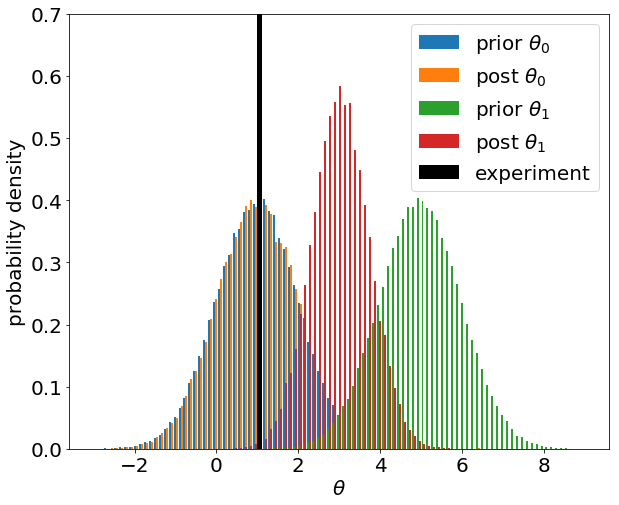

<Figure size 864x576 with 0 Axes>

In [12]:
# Sample the gaussian prior for theta0 and theta1

pri_the_0 = randn(len(post)) + 1
pri_the_1 = randn(len(post)) + 5
pri_the_0.shape

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(10,8))
bins = np.linspace(-3, 9, 100) #(-3, 9, 100)
(density0,bins0,pathces0)=ax.hist([pri_the_0,post_the_0],bins,label=[r'prior $\theta_{0}$',r'post $\theta_{0}$'],density=True)
(density1,bins1,pathces1)=ax.hist([pri_the_1,post_the_1],bins,label=[r'prior $\theta_{1}$',r'post $\theta_{1}$'],density=True)
p3 = ax.hist(np.array([1.0]),bins,label=['experiment'],facecolor='k',density=True)
params = {'mathtext.default': 'regular' } 
ax.set_ylim([0.0,0.7])
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('probability density')
plt.gca().legend()
plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0.15)
ax.autoscale_view()
fig.savefig('pri_post_base_hist.png',dpi=100)

In [13]:
density0[0].shape

(99,)

In [14]:
#density contains the p(theta|y_0^*=1) in density[1] and the prior p(N(1,1)) in density[0].  The probabilities p
#are in the same bin locations so a summation can be performed.
#Make sure density1 or density0 match fp_p_seq_1_exp_# or fp_p_seq_0_exp_#, respectively.
prior = np.asarray(density1[0])
post = np.asarray(density1[1])
KL = np.nan_to_num(post*np.log(post/prior))  #remove negative and invert prior/post in the log when 
#getting infinity.  Mathematically they are equivalent but if a zero is in the denominator result goes to infinity.
KL[KL>1E300] = 0  #There are regions of no overlap where infinities will be encountered.  These are not added
#to the KL divergence.
#print(KL)
KL = np.sum(KL)
print(KL)

#Gaussian analytical formula
mean_pri = np.mean(prior)
std_pri = np.std(prior)
mean_post = np.mean(post)
std_post = np.std(post)

KL_ana = 0.5 * (np.log(std_pri**2/std_post**2) + 
            std_post**2/std_pri**2 + (mean_post-mean_pri)**2
            /std_pri**2 - 1)
#0.5 * (log(sigq^2/sigp^2) + sigp^2/sigq^2 + (mup-muq)^2/sigq^2 - 1)
print(KL_ana)


17.31310451626964
0.06415191903032025


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


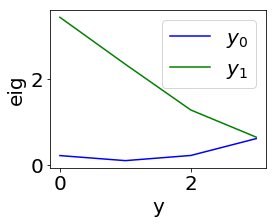

In [15]:
y_0 = np.array([0.0, 1.0, 2.0, 3.0]) 
y_1 = np.array([0.0, 1.0, 2.0, 3.0])
eig_0 = np.array([0.219897,0.103361,0.222729,0.612259])
eig_1 = np.array([3.4139,2.32909,1.273,0.645288])

fig, ax = plt.subplots(figsize=(4,3))
p1=ax.plot(y_0, eig_0, 'b', label=r'$y{_0}$')
p2=ax.plot(y_1, eig_1, 'g',label=r'$y{_1}$')
ax.set_xlabel('y')
ax.set_ylabel('eig')
plt.gca().legend()
ax.autoscale_view()
fig.subplots_adjust(left=0.15)
fig.subplots_adjust(bottom=0.15)
fig.savefig('eig.png',dpi=300)

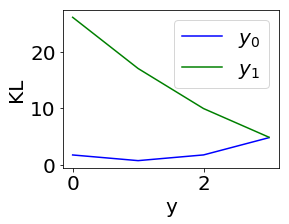

In [16]:
KL_0 = np.asarray([1.7524291433799108,0.7476250302681156,1.7597385075114331,4.817470522943548])
KL_1 = np.asarray([26.139987188507476,17.068479558170793,9.971516512048423,4.891687048058696])
fig, ax = plt.subplots(figsize=(4,3))
p1=ax.plot(y_0, KL_0, 'b', label=r'$y{_0}$')
p2=ax.plot(y_1, KL_1, 'g',label=r'$y{_1}$')
ax.set_xlabel('y')
ax.set_ylabel('KL')
plt.gca().legend()
ax.autoscale_view()
fig.subplots_adjust(left=0.15)
fig.subplots_adjust(bottom=0.15)
fig.savefig('eig_KL.png',dpi=300)

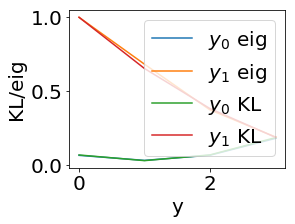

In [17]:
eig_0_norm = eig_0/eig_1[0]
eig_1_norm = eig_1/eig_1[0]
KL_0_norm = KL_0/KL_1[0]
KL_1_norm = KL_1/KL_1[0]

fig, ax = plt.subplots(figsize=(4,3))
p1=ax.plot(y_0, eig_0_norm, label=r'$y{_0}$ eig')
p2=ax.plot(y_1, eig_1_norm, label=r'$y{_1}$ eig')
p1=ax.plot(y_0, KL_0_norm, label=r'$y{_0}$ KL')
p2=ax.plot(y_1, KL_1_norm, label=r'$y{_1}$ KL')
ax.set_xlabel('y')
ax.set_ylabel('KL/eig')
plt.gca().legend()
ax.autoscale_view()
fig.subplots_adjust(left=0.15)
fig.subplots_adjust(bottom=0.15)
fig.savefig('eig_KL_normed.png',dpi=300)

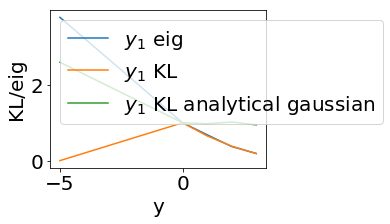

In [18]:
y_1 = np.array([-5.0, 0.0, 1.0, 2.0, 3.0])
eig_1 = np.array([12.9263,3.4139,2.32909,1.273,0.645288])
KL_1 = np.asarray([0.0,26.139987188507476,17.068479558170793,9.971516512048423,4.891687048058696])
KL_1_gau_ana = np.asarray([0.16541504868296286,0.06365160323508079,0.06200809247750716,0.0649186583419128,0.06017327768271841])
eig_1_norm = eig_1/eig_1[1]
KL_1_norm = KL_1/KL_1[1]
KL_2_gau_ana_norm = KL_1_gau_ana/KL_1_gau_ana[1]
fig, ax = plt.subplots(figsize=(4,3))
p1=ax.plot(y_1, eig_1_norm, label=r'$y{_1}$ eig')
p2=ax.plot(y_1, KL_1_norm, label=r'$y{_1}$ KL')
p3=ax.plot(y_1, KL_2_gau_ana_norm, label=r'$y{_1}$ KL analytical gaussian')
params = {'mathtext.default': 'regular' }
ax.set_xlabel('y')
ax.set_ylabel('KL/eig')
plt.gca().legend()
ax.autoscale_view()
fig.subplots_adjust(left=0.15)
fig.subplots_adjust(bottom=0.15)
fig.savefig('eig_KL_normed.png',dpi=300)